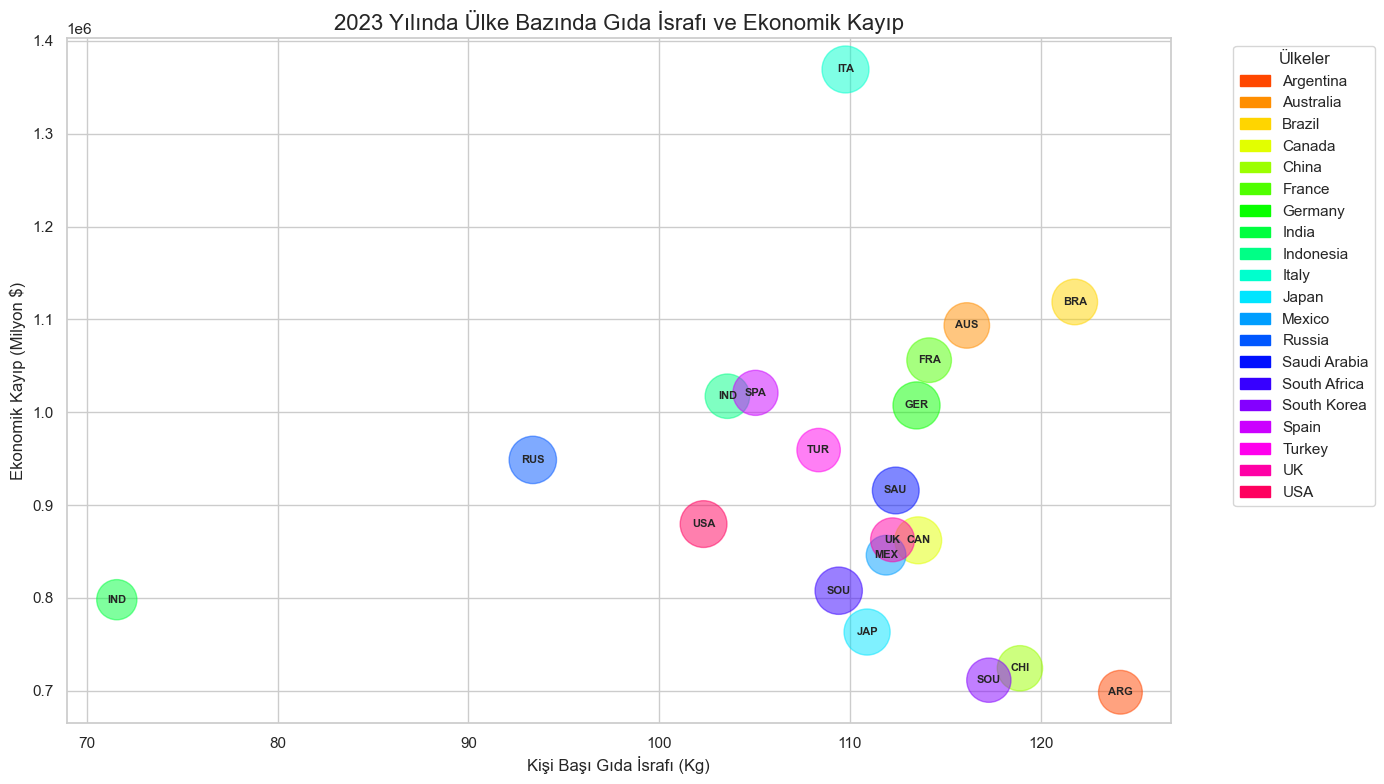

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

df = pd.read_csv("global_food_wastage_dataset.csv")

df_filtered = df[df["Year"] == 2023].copy()

df_summary = df_filtered.groupby("Country").agg({
    "Avg Waste per Capita (Kg)": "mean",
    "Economic Loss (Million $)": "sum",
    "Population (Million)": "mean"
}).reset_index()

df_summary["Code"] = df_summary["Country"].str[:3].str.upper()

palette = sns.color_palette("hsv", len(df_summary))
country_colors = dict(zip(df_summary["Country"], palette))

bubble_sizes = df_summary["Population (Million)"] * 1.5

plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

plt.scatter(
    df_summary["Avg Waste per Capita (Kg)"],
    df_summary["Economic Loss (Million $)"],
    s=bubble_sizes,
    c=[country_colors[c] for c in df_summary["Country"]],
    alpha=0.5
)

for i, row in df_summary.iterrows():
    plt.text(
        row["Avg Waste per Capita (Kg)"],
        row["Economic Loss (Million $)"],
        row["Code"],
        fontsize=8,
        ha='center',
        va='center',
        weight='bold'
    )

plt.xlabel("Kişi Başı Gıda İsrafı (Kg)", fontsize=12)
plt.ylabel("Ekonomik Kayıp (Milyon $)", fontsize=12)
plt.title("2023 Yılında Ülke Bazında Gıda İsrafı ve Ekonomik Kayıp", fontsize=16)

legend_patches = [
    mpatches.Patch(color=country_colors[country], label=country)
    for country in df_summary["Country"]
]

plt.legend(
    handles=legend_patches,
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    title="Ülkeler"
)

plt.tight_layout()
plt.show()